In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [46]:
data = pd.read_csv('ITC.csv')

In [47]:
data.index = pd.to_datetime(data.index)
data['Date'] = data.index

In [48]:
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

X = data['Date_ordinal'].values.reshape(-1, 1)
y = data['Close'].values

In [49]:
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [50]:
train_size = int(len(X) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [52]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Training MSE: 125223.24589416958
Test MSE: 46495.38125764639


In [53]:
last_date = data['Date'].max()
future_dates = pd.date_range(last_date, periods=30, freq='D')

In [54]:
future_dates_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
future_dates_poly = poly.transform(future_dates_ordinal)
future_predictions = model.predict(future_dates_poly)

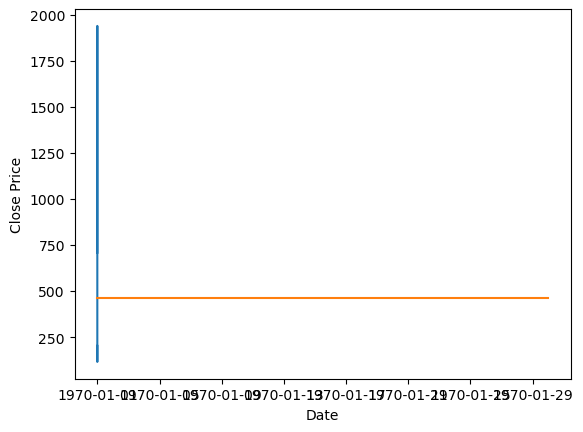

In [55]:
plt.plot(data['Date'], y, label='Historical Prices')
plt.plot(future_dates, future_predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()
